In [85]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from onezone.constants import CONST as const

In [86]:
def SNII_luminosity(x, dt):
    return 1.0E51 * x / dt

In [94]:
def cumulative_to_rate(x):
    rate = np.zeros(np.shape(x))
    rate[0]  = 0.0
    rate[1:] = x[1:] - x[0:-1]
    
    return rate

In [95]:
#
# Load the summary output file
#

data = np.genfromtxt('summary_output.txt', names=True)

# all information
print data.dtype.names

('t', 'M_gas', 'M_DM', 'M_star', 'Z_gas', 'Z_star', 'N_star', 'N_SNIa', 'N_SNII', 'Mdot_ej', 'L_FUV', 'Q0', 'Q1', 'L_wind', 'L_Q0', 'L_Q1', 'm_tot', 'Ni', 'C', 'H', 'O', 'N', 'Fe', 'm_metal', 'He')


In [96]:
nsnII = data['N_SNIa']
print nsnII
print cumulative_to_rate(nsnII)

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   2.00000000e+00
   5.00000000e+00   9.00000000e+00   1.50000000e+01   2.40000000e+01
   3.30000000e+01   4.60000000e+01   6.40000000e+01   9.00000000e+01
   1.18000000e+02   1.51000000e+02   1.88000000e+02   2.25000000e+02
   2.66000000e+02   3.14000000e+02   3.64000000e+02   4.18000000e+02
   4.75000000e+02   5.31000000e+02   5.96000000e+02   6.59000000e+02
   7.30000000e+02   8.03000000e+02   8.80000000e+02   9.62000000e+02
   1.04600000e+03   1.13300000e+03   1.22100000e+03   1.32300000e+03
   1.42000000e+03   1.52600000e+03   1.63200000e+03   1.74000000e+03
   1.84800000e+03   1.95900000e+03   2.07900000e+03   2.19900000e+03
   2.33200000e+03   2.46500000e+03   2.59500000e+03   2.73300000e+03
   2.87200000e+03   3.02600000e+03   3.17400000e+03   3.33400000e+03
   3.49700000e+03   3.66500000e+03

In [97]:
print "Final time = %.5f Myr"%(data['t'][-1])
print "M_gas = %5.5E"%(data['M_gas'][-1])
print "M_star = %5.5E"%(data['M_star'][-1])
print "N_star = %8i"%(data['N_star'][-1])

print 'N_SNII %4i'%(data['N_SNII'][-1])
print 'N_SNIa %4i'%(data['N_SNIa'][-1])


Final time = 32.00000 Myr
M_gas = 1.40982E+06
M_star = 5.32217E+05
N_star =   308558
N_SNII    0
N_SNIa 4869


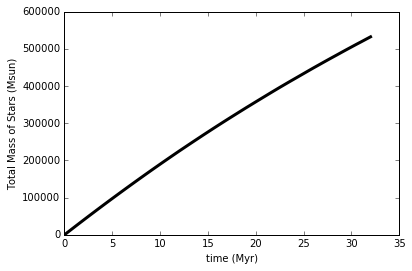

In [98]:
#
# Lets plot cumulative SF
#
plt.plot(data['t'], data['M_star'], lw = 3, color ='black')
plt.xlabel('time (Myr)')
plt.ylabel('Total Mass of Stars (Msun)')

# constant SFR... not surprising

In [99]:
nsnII = data['N_SNIa']
dNsnII_dt = cumulative_to_rate(nsnII)

L_SNII = SNII_luminosity(dNsnII_dt, 0.5 * 1.0E6 * const.yr_to_s)

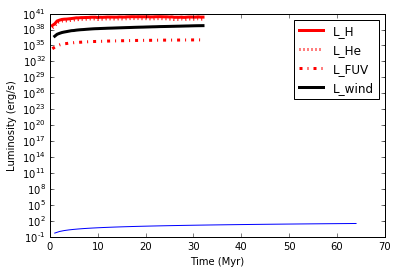

In [100]:
#
# Lets plot the luminosities
#

plt.plot(data['t'], data['L_Q0'], label = 'L_H', lw = 3, color = 'red')
plt.plot(data['t'], data['L_Q1'], label = 'L_He', lw = 3, color = 'red', ls = ':')
plt.plot(data['t'], data['L_FUV'], label = 'L_FUV', lw = 3, color = 'red', ls = '-.')

plt.plot(data['t'], data['L_wind'], label = 'L_wind', lw = 3, color = 'black', ls = '-')

plt.plot(data['t'], L_SNII, label='L_SNII'

plt.xlabel('Time (Myr)')
plt.ylabel('Luminosity (erg/s)')

plt.semilogy()
plt.legend(loc='best')

In [62]:
(1.0 * u.AU).to(u.pc)

<Quantity 4.848136811133344e-06 pc>